# Feature Engineering & Feature Extraction

## Attaching Resources

### Importing Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (15,8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

<Figure size 3750x2000 with 0 Axes>

### Adding Dataset

In [4]:
bf = pd.read_csv('EDA.csv')
bf

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,1,10,0,2,0,3,8.0,16.0,8370
1,1000001,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,1,10,0,2,0,12,8.0,16.0,1422
3,1000001,P00085442,0,1,10,0,2,0,12,14.0,16.0,1057
4,1000002,P00285442,1,7,16,2,4,0,8,8.0,16.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
99996,1003503,P00296342,1,2,4,1,0,0,8,8.0,16.0,7824
99997,1003503,P00227842,1,2,4,1,0,0,2,5.0,16.0,13235
99998,1003503,P00315842,1,2,4,1,0,0,5,8.0,16.0,7085
99999,1003503,P00344842,1,2,4,1,0,0,5,8.0,16.0,7012


## Splitting The Data Into Target and Independent set

In [5]:
x = bf.drop(columns=['User_ID', 'Product_ID', 'Purchase'])
y = bf['Purchase']

In [6]:
x

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,1,10,0,2,0,3,8.0,16.0
1,0,1,10,0,2,0,1,6.0,14.0
2,0,1,10,0,2,0,12,8.0,16.0
3,0,1,10,0,2,0,12,14.0,16.0
4,1,7,16,2,4,0,8,8.0,16.0
...,...,...,...,...,...,...,...,...,...
99996,1,2,4,1,0,0,8,8.0,16.0
99997,1,2,4,1,0,0,2,5.0,16.0
99998,1,2,4,1,0,0,5,8.0,16.0
99999,1,2,4,1,0,0,5,8.0,16.0


### Performing Feature Selection

#### Performing Mutual Info

In [7]:
mutual_scores = mutual_info_regression(x, y)
mutual_scores

array([6.29886945e-03, 4.38247780e-03, 8.24617150e-03, 3.90597017e-03,
       1.37072890e-03, 1.40215981e-03, 1.62776564e+00, 4.54644266e-01,
       1.96260354e-01])

In [8]:
mutual_info_test = pd.DataFrame(mutual_scores).T
mutual_info_test.columns = x.columns

mutual_info_test

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0.006299,0.004382,0.008246,0.003906,0.001371,0.001402,1.627766,0.454644,0.19626


#### Performing Tree Based method

In [9]:
dt = DecisionTreeRegressor()
dt.fit(x,y)

DecisionTreeRegressor()

In [10]:
dt.feature_importances_

array([0.01652925, 0.04496527, 0.07273516, 0.01922016, 0.04636978,
       0.02075304, 0.73134304, 0.02852093, 0.01956337])

### Performing Extra Trees Regressor

In [11]:
et = ExtraTreesRegressor()
et.fit(x,y)

ExtraTreesRegressor()

In [12]:
et.feature_importances_

array([0.01030721, 0.04499426, 0.08585193, 0.01267781, 0.04828017,
       0.01445106, 0.6650653 , 0.07879288, 0.03957937])

In [13]:
imp_cols = pd.DataFrame({
    'Features' : x.columns,
    'MI' : mutual_scores,
    'IG' : dt.feature_importances_,
    'ET' : et.feature_importances_
})

imp_cols

,Features,MI,IG,ET
0,Gender,0.006299,0.016529,0.010307
1,Age,0.004382,0.044965,0.044994
2,Occupation,0.008246,0.072735,0.085852
3,City_Category,0.003906,0.019220,0.012678
4,Stay_In_Current_City_Years,0.001371,0.046370,0.048280
5,Marital_Status,0.001402,0.020753,0.014451
6,Product_Category_1,1.627766,0.731343,0.665065
7,Product_Category_2,0.454644,0.028521,0.078793
8,Product_Category_3,0.196260,0.019563,0.039579


### Compairing All Result

<Axes: xlabel='Features', ylabel='MI'>

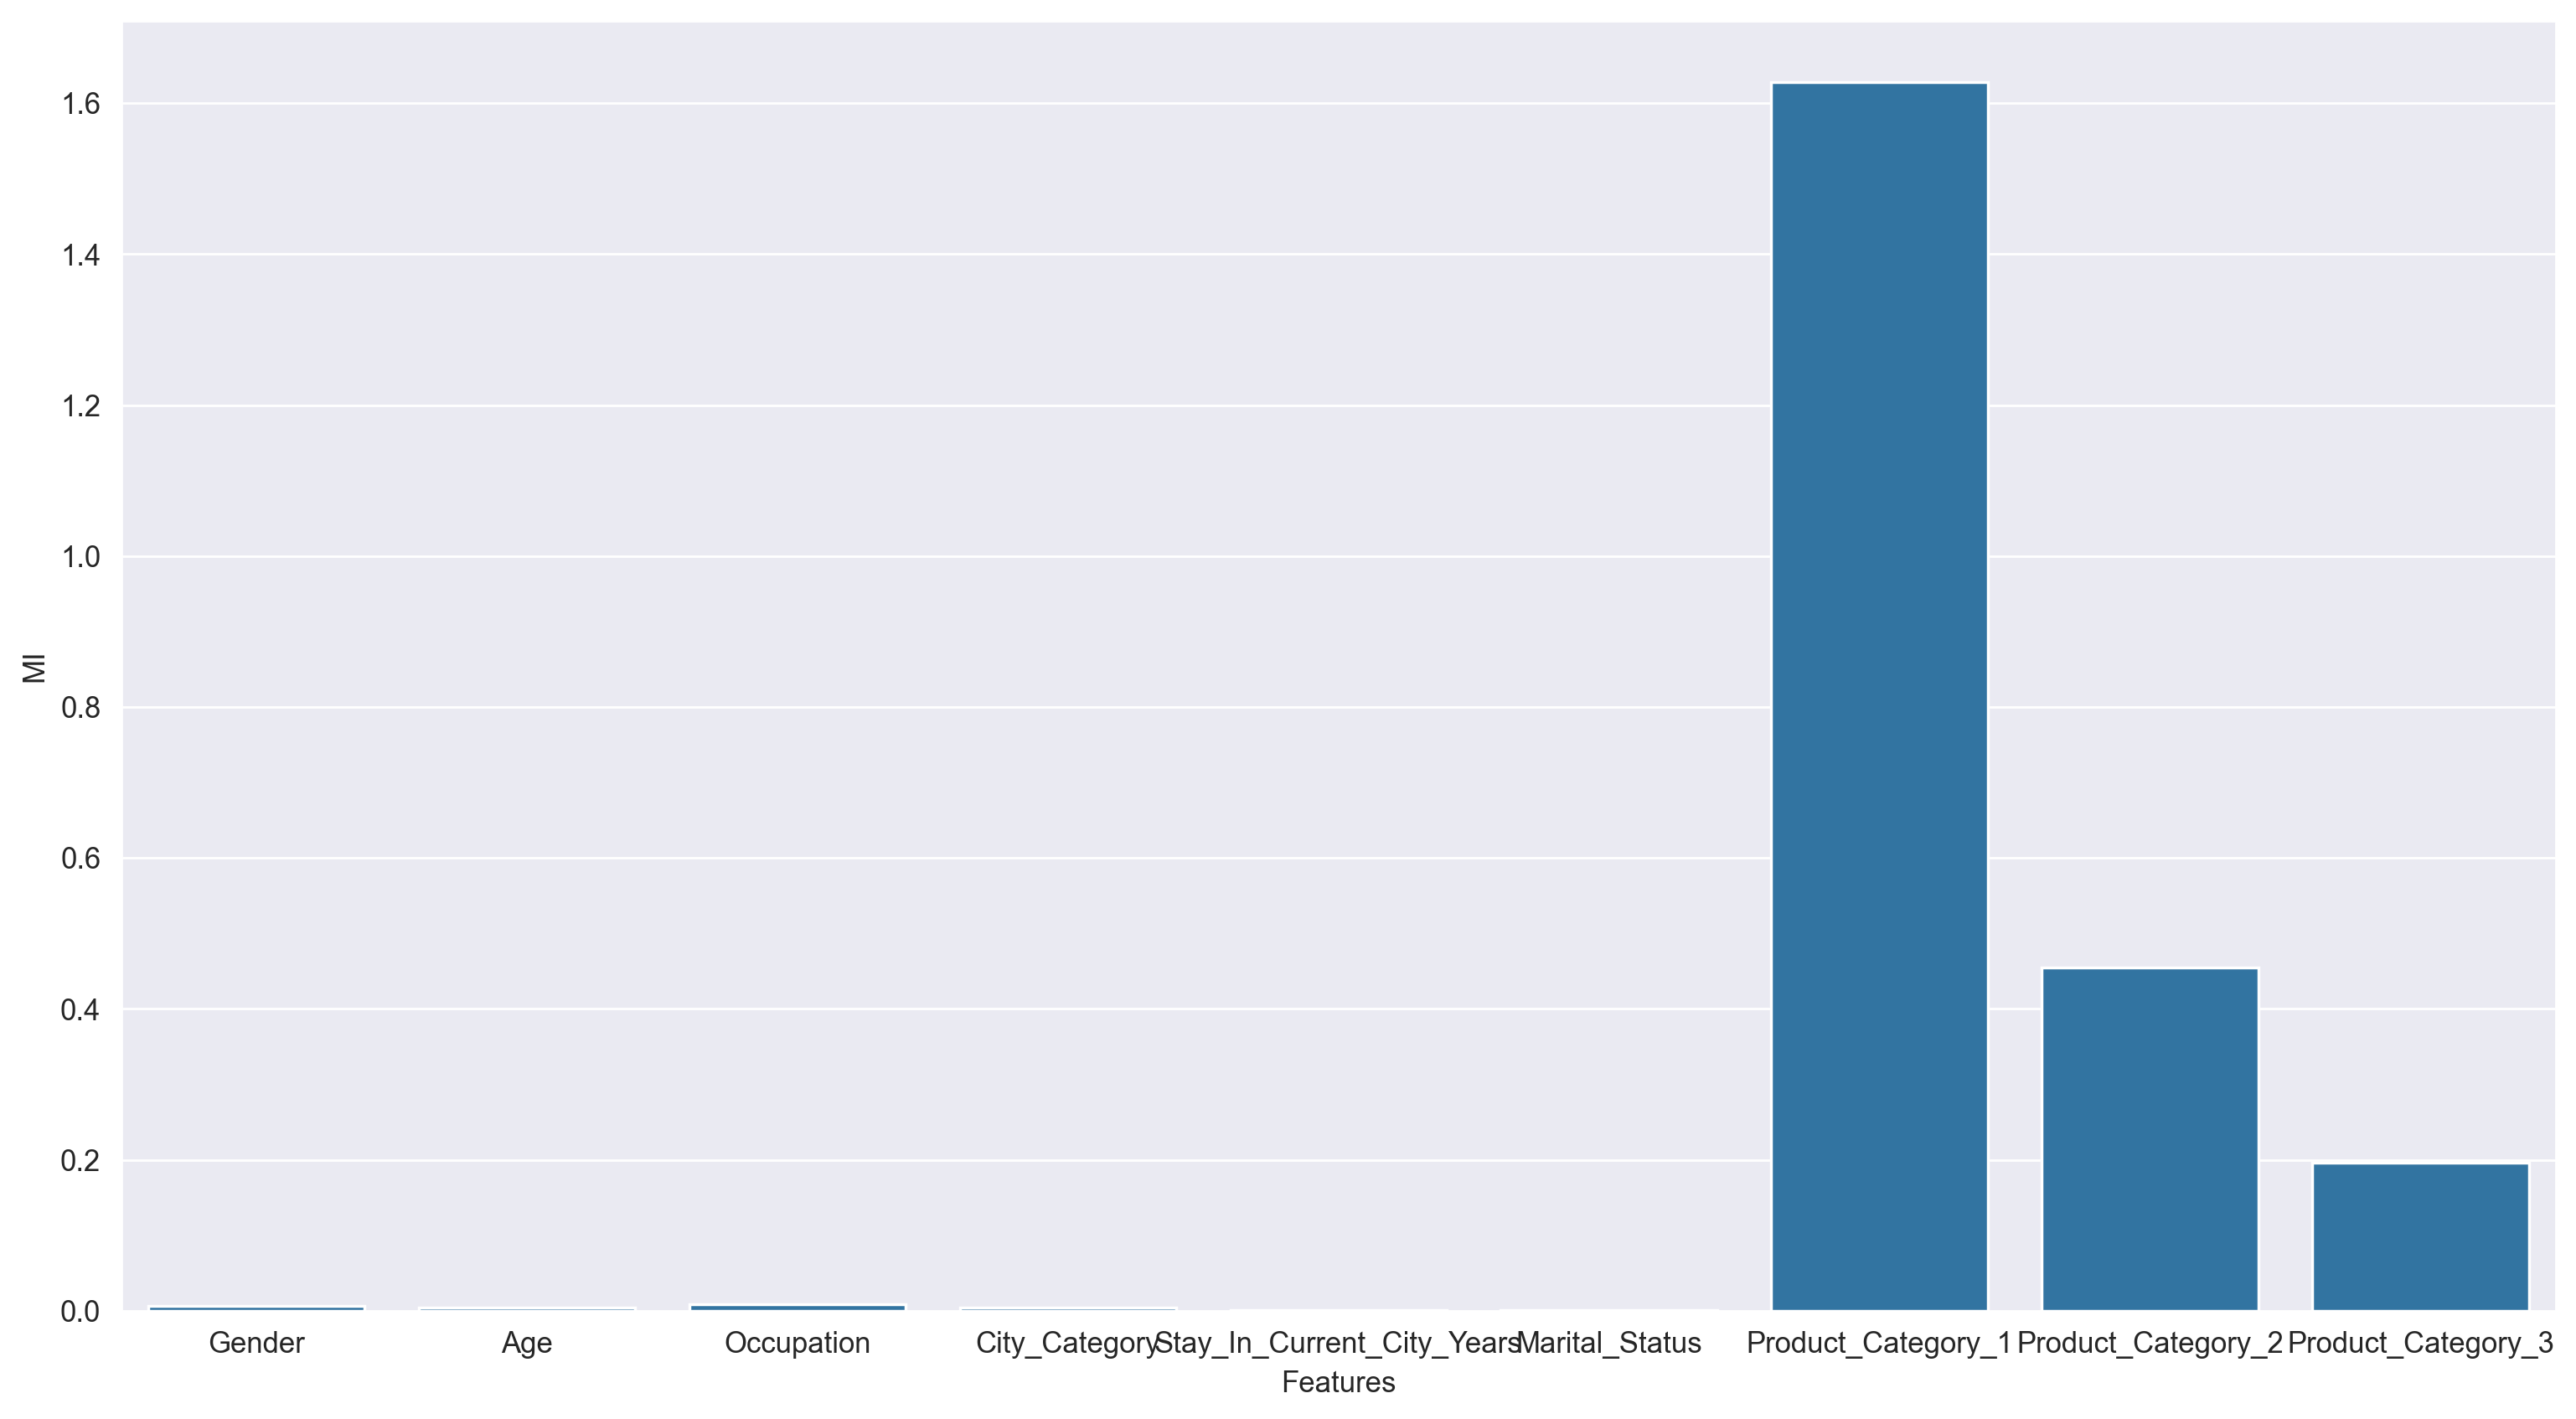

In [14]:
sns.barplot(x = 'Features',
            y = 'MI',
            data = imp_cols)

<Axes: xlabel='Features', ylabel='IG'>

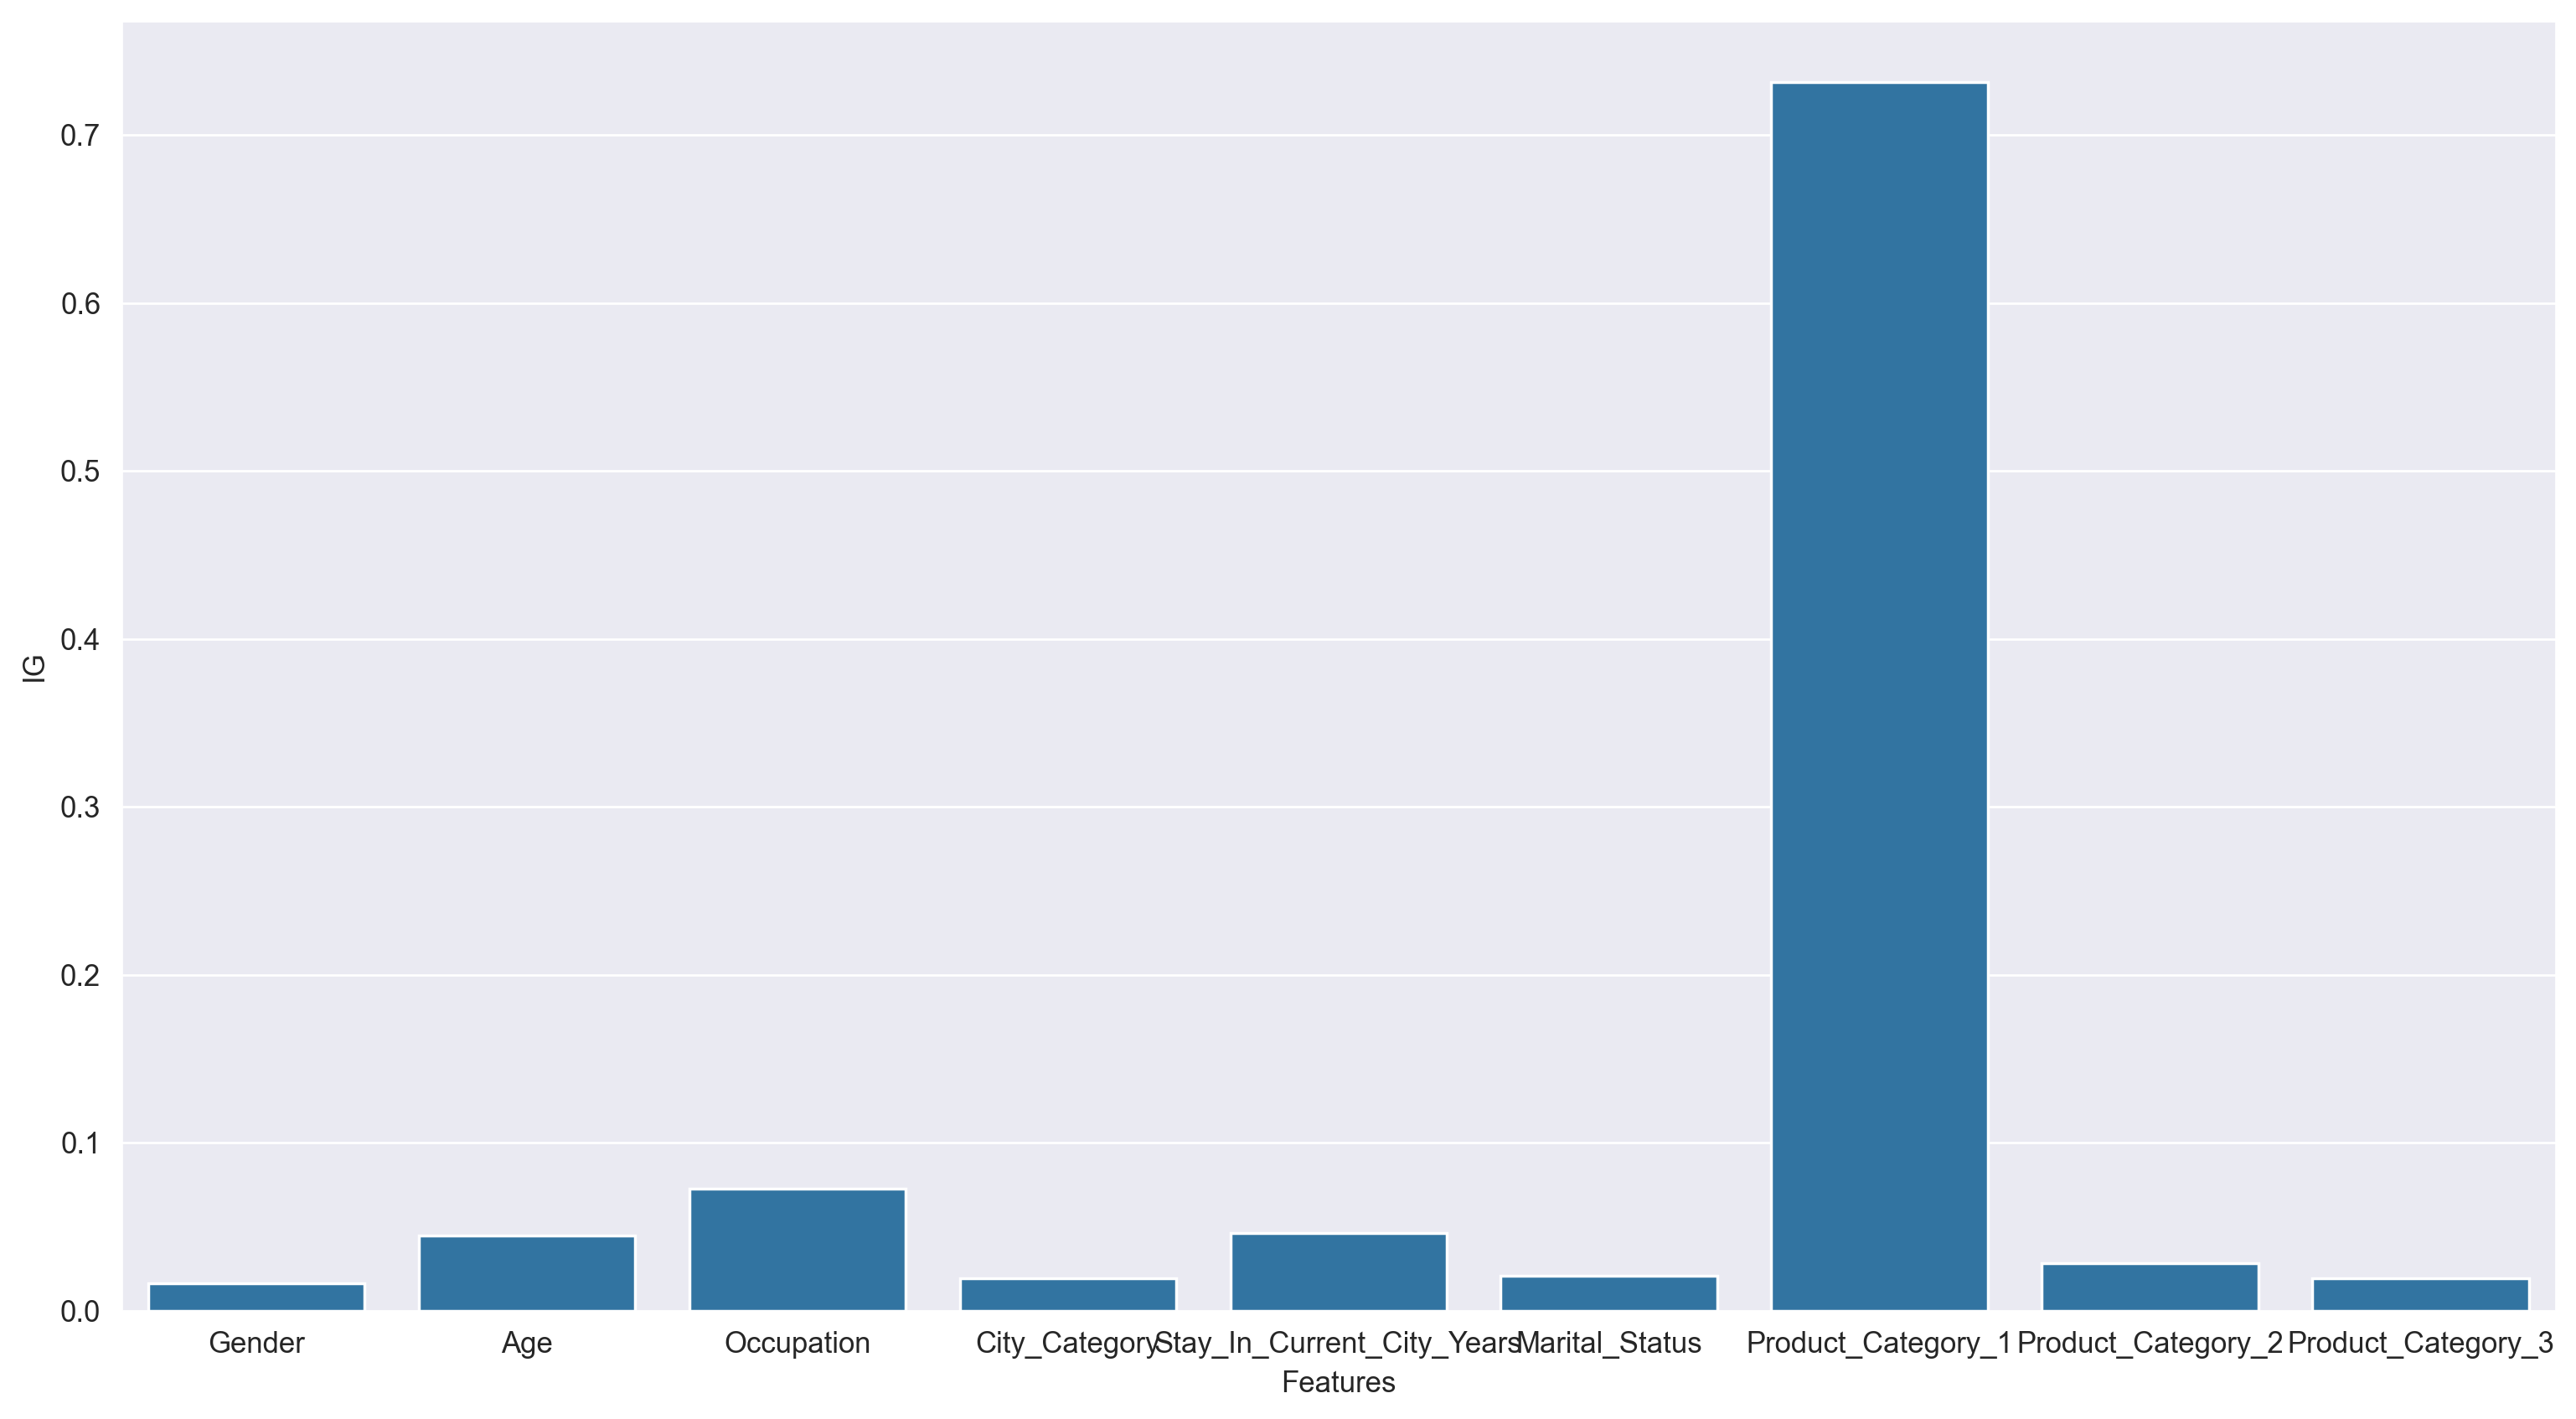

In [15]:
sns.barplot(x = 'Features',
            y = 'IG',
            data = imp_cols)

<Axes: xlabel='Features', ylabel='ET'>

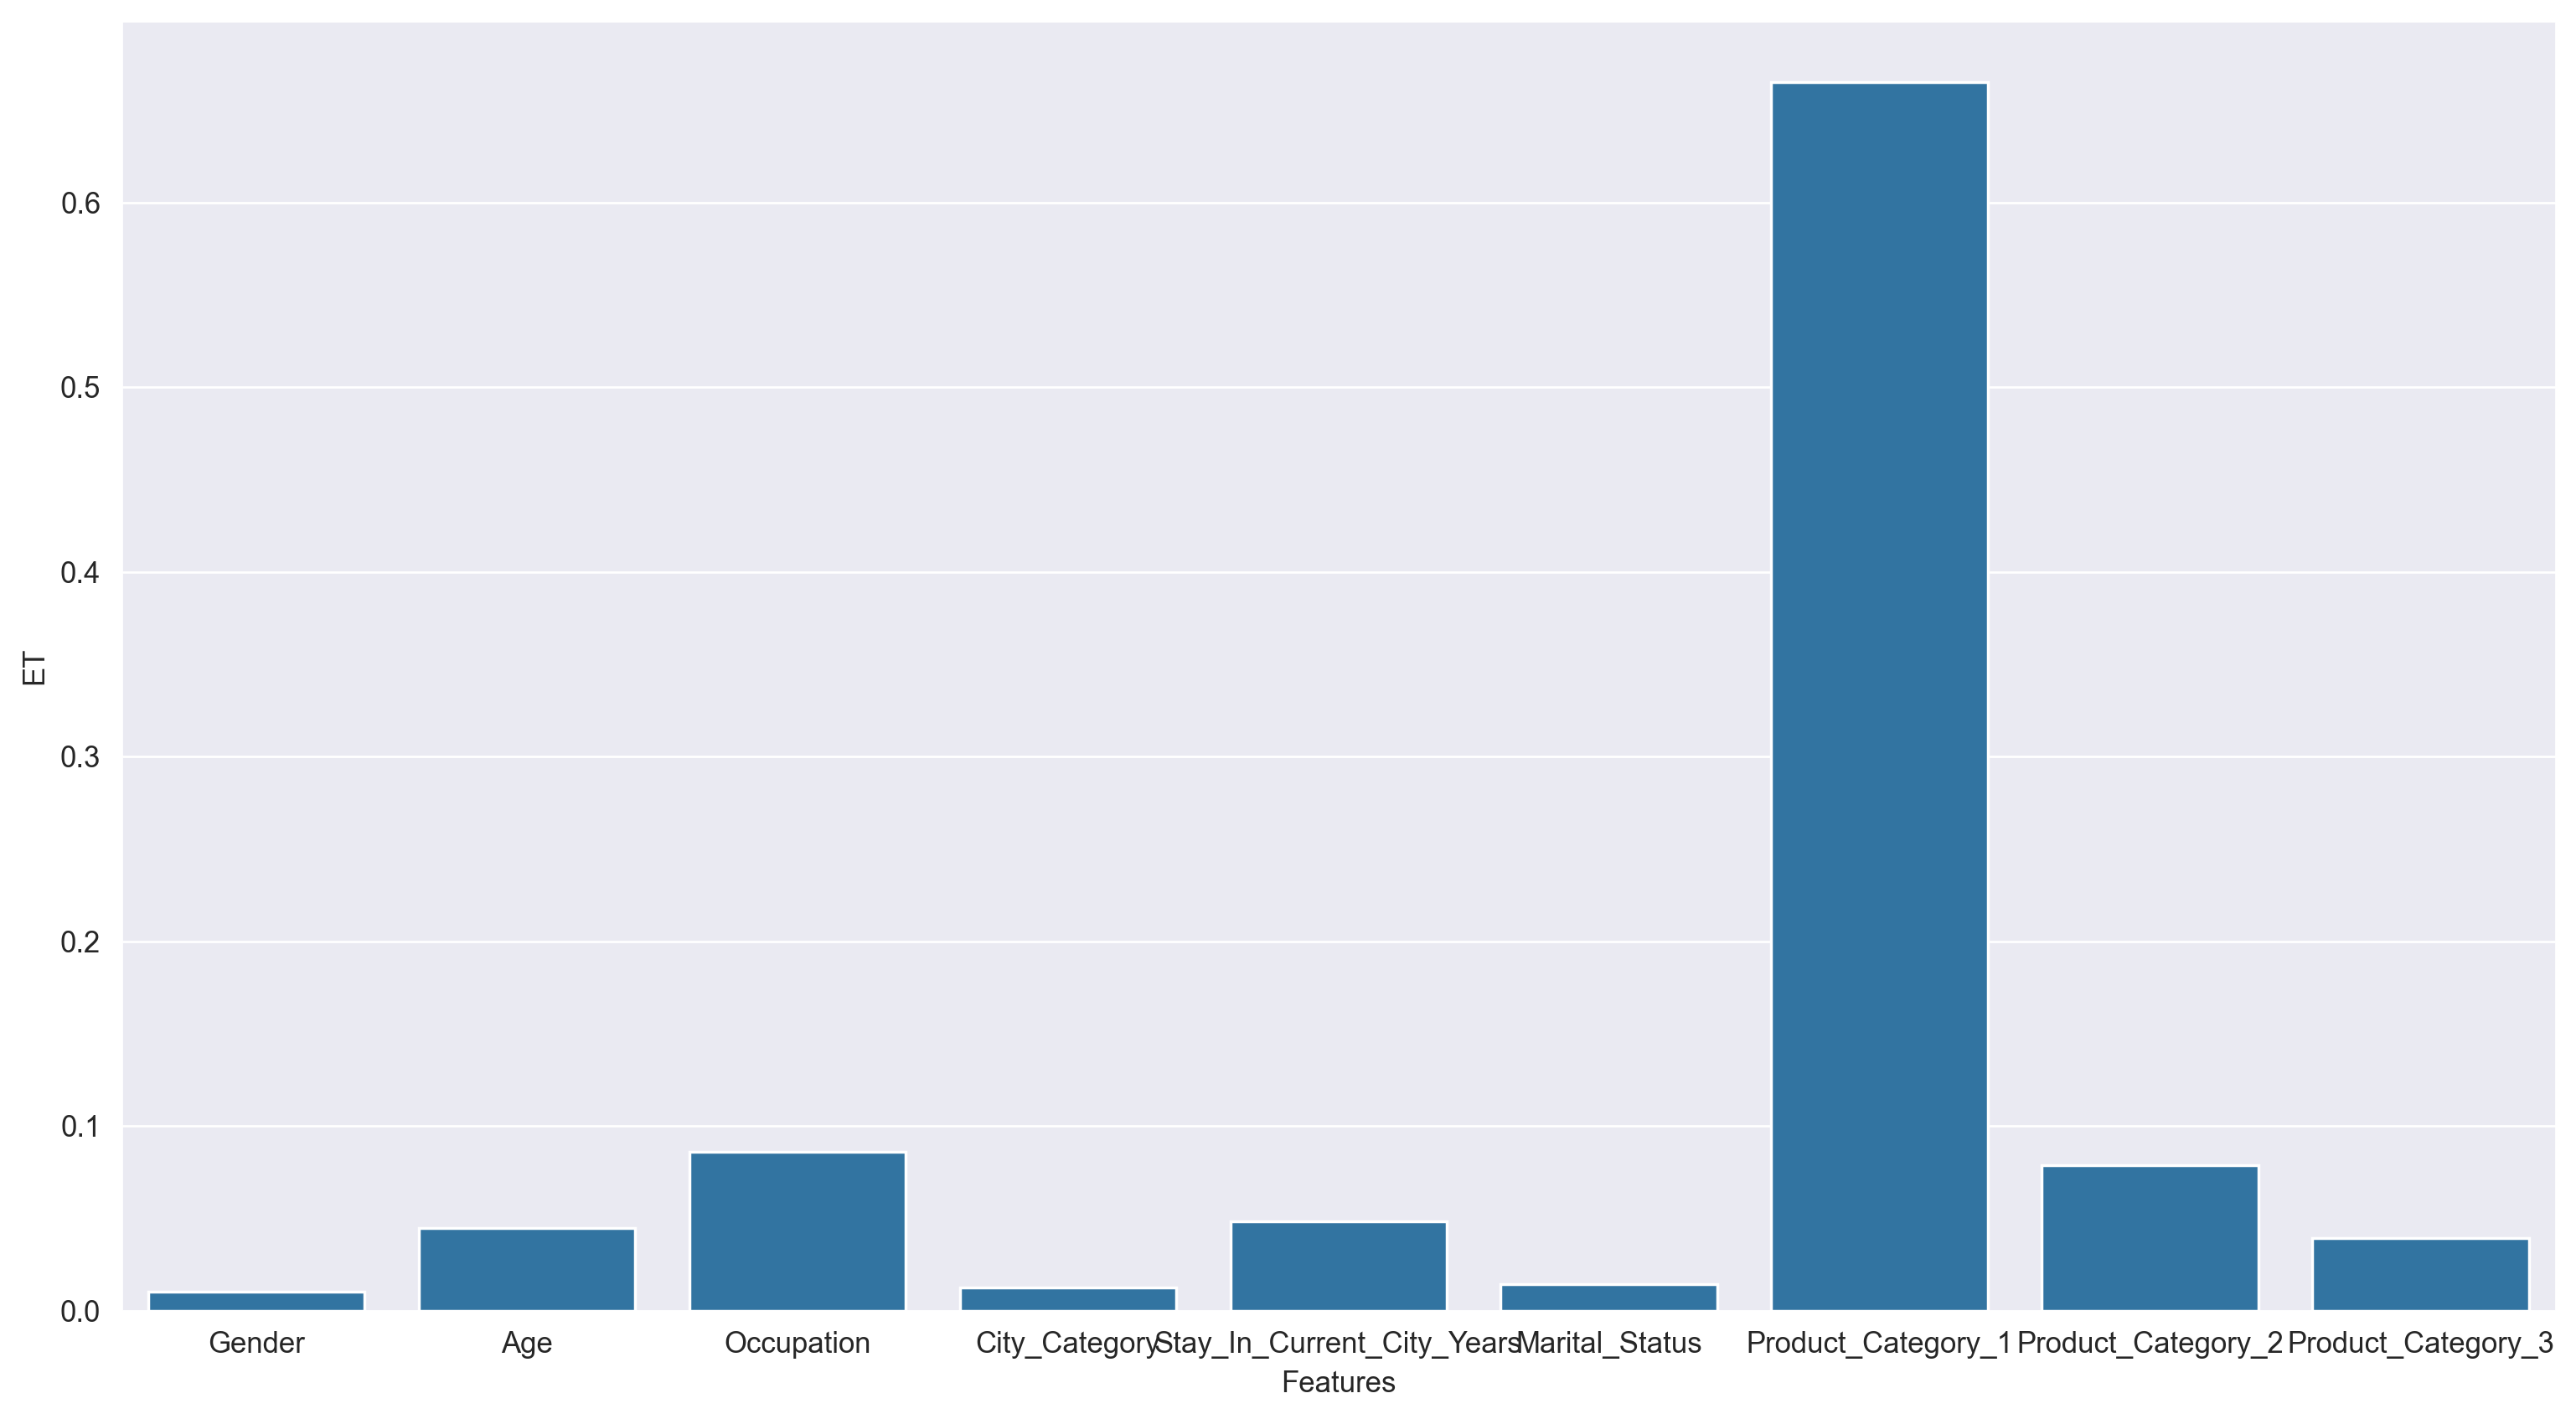

In [16]:
sns.barplot(x = 'Features',
            y = 'ET',
            data = imp_cols)

### Picking Features After Feature Engineering

In [18]:
x.drop(['Gender', 'City_Category', 'Marital_Status','Product_Category_3'], axis = 1, inplace = True)

x

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2
0,1,10,2,3,8.0
1,1,10,2,1,6.0
2,1,10,2,12,8.0
3,1,10,2,12,14.0
4,7,16,4,8,8.0
...,...,...,...,...,...
99996,2,4,0,8,8.0
99997,2,4,0,2,5.0
99998,2,4,0,5,8.0
99999,2,4,0,5,8.0


### Normalizing The Dataset

In [19]:
sc = StandardScaler()
scaled_x  = pd.DataFrame(sc.fit_transform(x), columns=x.columns)

In [20]:
scaled_x

,Age,Occupation,Stay_In_Current_City_Years,Product_Category_1,Product_Category_2
0,-1.827262,0.292351,0.103434,-0.616322,-0.296936
1,-1.827262,0.292351,0.103434,-1.151850,-0.761597
2,-1.827262,0.292351,0.103434,1.793553,-0.296936
3,-1.827262,0.292351,0.103434,1.793553,1.097047
4,2.586867,1.211319,1.651862,0.722497,-0.296936
...,...,...,...,...,...
99996,-1.091574,-0.626617,-1.444994,0.722497,-0.296936
99997,-1.091574,-0.626617,-1.444994,-0.884086,-0.993928
99998,-1.091574,-0.626617,-1.444994,-0.080794,-0.296936
99999,-1.091574,-0.626617,-1.444994,-0.080794,-0.296936


### Exporting Dataframe

In [ ]:
scaled_x.to_csv('x.csv', index=False)
y.to_csv('y.csv', index=False)